In [18]:
import tensorflow as tf
import numpy as np
#Sample Data : 
dataset = [[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]]



def grident_d(data, learning_rate, variance):

    theta0_guess = 1.
    theta1_guess = 1.
    theta2_guess = 1.

    theta0_priv = 10.
    theta1_priv = 10.
    theta2_priv = 10.

    m = len(data)

    while (abs(theta1_guess-theta1_priv) > variance or abs(theta0_guess - theta0_priv) > variance or abs(theta2_guess - theta2_priv) > variance):

        theta1_priv = theta1_guess
        theta0_priv = theta0_guess
        theta2_guess =theta2_priv
        hypothesis =lambda x: theta1_guess*x + theta0_guess

        theta0_guess -=  learning_rate * (1./(2*m)) * sum([hypothesis(point[0]) - point[1] for point in data])
        theta1_guess -=  learning_rate * (1./(2*m)) * sum([ (hypothesis(point[0]) - point[1]) * point[0] for point in data])   
        theta2_guess -=  learning_rate * (1./(2*m)) * sum([ (hypothesis(point[0]) - point[1]) * point[0] for point in data])   

    return ( theta0_guess,theta1_guess,theta2_guess)



points = [(float(x),float(y),float(z)) for (x,y,z) in dataset]
v=np.var(dataset)

res = grident_d(points,0.005,v)
print(res)



(0.99143172686725, 0.9393031606605634, 9.943876969909653)


After 10 epochs, accuracy = 0.5
After 20 epochs, accuracy = 0.5
After 30 epochs, accuracy = 0.5
After 40 epochs, accuracy = 0.5
After 50 epochs, accuracy = 0.5
After 60 epochs, accuracy = 0.5
After 70 epochs, accuracy = 0.5
After 80 epochs, accuracy = 0.5
After 90 epochs, accuracy = 0.5
After 100 epochs, accuracy = 0.5
W = [ 1.09407088 -1.57244211]
b = -0.546480121825


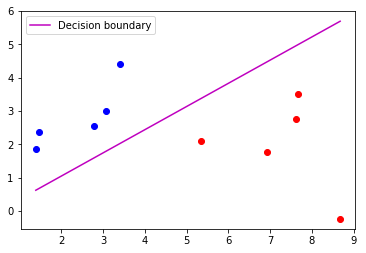

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('/home/komal/1.txt')


X_data = data[:,:2]
Y_data = data[:,2:] 

#h theta(x) hypothesis is given by sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def predict(x, W, b):
    logits = np.matmul(x, W) + b
    return 1 * (logits >= 0)

def compute_accuracy(x, W, b, y):
    labels = predict(x, W, b)
    return np.mean(labels == y)

def compute_gradients(x, W, b, y):
    logits = np.matmul(x, W) + b
    y_pred = sigmoid(logits)
    error  = y_pred - y

    dLdW  = np.mean(error * x.T, axis=1)
    dLdb  = np.mean(error)

    return dLdW, dLdb

# Hyperparameters
learning_rate = 0.01
num_epochs    = 100


W = np.zeros(2)
b = 0.0


np.random.seed(0)

# Minimize the loss function
for epoch in range(num_epochs):
    # Present each data point once in random order
    idx = np.random.permutation(data.shape[0])
    for i in idx:
        grads = compute_gradients(X_data[i:i+1], W, b, Y_data[i:i+1])
        W -= learning_rate * grads[0]
        b -= learning_rate * grads[1]

    # Progress report
    if (epoch+1) % 10 == 0:
        accuracy = compute_accuracy(X_data, W, b, Y_data)
        print("After {} epochs, accuracy = {}".format(epoch+1, accuracy))

# Print the result
print("W =", W)
print("b =", b)
# Model predictions
labels = predict(X_data, W, b)

# Find indices for the two species
idx_0, = np.where(labels == 0)
idx_1, = np.where(labels == 1)

# Plot the data
plt.plot(X_data[idx_0,0], X_data[idx_0,1], 'bo')
plt.plot(X_data[idx_1,0], X_data[idx_1,1], 'ro')

# Plot the separating hyperplane
x_sep = np.linspace(X_data[:,0].min(), X_data[:,0].max())
y_sep = (-b - W[0]*x_sep) / W[1]
plt.plot(x_sep, y_sep, 'm', label="Decision boundary")

# Legend
plt.legend()

plt.show()